# Analysis Google PlayStore

by (Bashayer Alshehri 8 Sep, 2020)

## Table Of Contents:
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#Gather">Gathering Data</a></li>
<li><a href="#asses">Assessing Data</a></li>
<li><a href="#Clean">Cleaning Data</a></li>    
<li><a href="#Visual">Data Visualization</a></li>
<li><a href="#con">Conclusion Remarks</a></li>
</ul>

<a id='intro'></a>
## Introduction :

The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!

You can find  the Dataset from here : https://www.kaggle.com/lava18/google-play-store-apps

## Libraries :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

<a id='Gather'></a>
## Gathering Data

In [2]:
# Load the data
df_Apps = pd.read_csv('googleplaystore.csv')

In [3]:
df_Apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


<a id='Asses'></a>
## Assessing Data :

In [4]:
# The dimensionality of the DataFrame.
df_Apps.shape

(10841, 13)

This Dataset includes about 10841 records and 13 features.

In [5]:
# Information about a DataFrame 
df_Apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


- The dataset includes about 12 objects and 1 float dtypes.
- There're missing values in Rating, Type, Content Rating, Current Ver and Android Ver features.
- Rating feature considered as the missing value that would be meaningful if they are observed.
- The number of Reviews, Installs, and Price need to be numeric values.

In [6]:
df_Apps.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

- About 1474 missing values in the Rating feature, 1 missing value in Type, 1 missing value in the Content Rating feature, 8 missing values in the Current Ver feature, and 3 missing values in Android Ver.

In [7]:
df_Apps.duplicated().sum()

483

- Need to drop the 483 duplicate records.

In [8]:
df_Apps.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


- It seems that there's an issue with rating since the max = 20 and the range of rating between 0-5.

In [9]:
df_Apps.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

In [10]:
df_Apps['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [11]:
df_Apps['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [12]:
df_Apps['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

- Need to drop records with price = 'Everyone'.

In [13]:
df_Apps['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

- Need to drop records with Rating = '19', since it's out of range.

In [14]:
df_Apps['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

- Need to drop records with Category = '1.9'.

In [15]:
df_Apps['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

- Need to drop records with Installs = 'Free'.

In [16]:
df_Apps['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

- Need to drop records with Type = '0'.

In [17]:
df_Apps['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [18]:
df_Apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [19]:
df_Apps['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [20]:
df_Apps['Rating'].value_counts()

4.4     1109
4.3     1076
4.5     1038
4.2      952
4.6      823
4.1      708
4.0      568
4.7      499
3.9      386
3.8      303
5.0      274
3.7      239
4.8      234
3.6      174
3.5      163
3.4      128
3.3      102
4.9       87
3.0       83
3.1       69
3.2       64
2.9       45
2.8       42
2.6       25
2.7       25
2.5       21
2.3       20
2.4       19
1.0       16
2.2       14
1.9       13
2.0       12
2.1        8
1.7        8
1.8        8
1.6        4
1.4        3
1.5        3
1.2        1
19.0       1
Name: Rating, dtype: int64

In [21]:
df_Apps['Type'].value_counts()

Free    10039
Paid      800
0           1
Name: Type, dtype: int64

In [22]:
df_Apps['Price'].value_counts()

0        10040
$0.99      148
$2.99      129
$1.99       73
$4.99       72
         ...  
$3.08        1
$2.60        1
$4.60        1
$3.28        1
$1.59        1
Name: Price, Length: 93, dtype: int64

In [23]:
df_Apps['Content Rating'].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [24]:
df_Apps['Genres'].value_counts()

Tools                                  842
Entertainment                          623
Education                              549
Medical                                463
Business                               460
                                      ... 
Lifestyle;Education                      1
Role Playing;Brain Games                 1
Health & Fitness;Action & Adventure      1
February 11, 2018                        1
Lifestyle;Pretend Play                   1
Name: Genres, Length: 120, dtype: int64

<a id='Clean'></a>
## Cleaning Data :

In [25]:
#copy data to another dataframe
df_CAPP = df_Apps.copy()

In [26]:
# Drop the duplicated records
df_CAPP.drop_duplicates(inplace = True)

In [27]:
#check 
df_CAPP.duplicated().sum()

0

In [28]:
#assign the median of rating feature to median variable.
median = df_CAPP['Rating'].median()
type(median)

float

In [29]:
# Fill missing values with the median
df_CAPP['Rating'].fillna(median,inplace=True)

In [30]:
#check
df_CAPP['Rating'].isna().sum()

0

In [31]:
# Drop the out of range record
df_CAPP.drop(df_CAPP[df_CAPP['Rating']==19].index,axis=0,inplace = True)

In [32]:
#check
df_CAPP['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 4.8, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

In [33]:
#chek
(df_CAPP['Rating'] > 5.0).sum()

0

In [34]:
#assign the mode of type feature to mode variable.
mode = df_CAPP['Type'].mode()
print(mode)

0    Free
dtype: object


In [35]:
# fill the null values in type with the mode
df_CAPP['Type'].fillna(df_CAPP['Type'].mode()[0],inplace=True)

In [36]:
#check
df_CAPP['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [37]:
#check
df_CAPP['Type'].isna().sum()

0

In [38]:
# fill the null values with the mode
mode_C = df_CAPP['Content Rating'].mode()
df_CAPP['Content Rating'].fillna(mode_C,inplace=True)
print(mode_C)

0    Everyone
dtype: object


In [39]:
df_CAPP['Content Rating'].isna().sum()

0

In [40]:
# fill the null values with the mode
mode_V = df_CAPP['Current Ver'].mode()
df_CAPP['Current Ver'].fillna(df_CAPP['Current Ver'].mode()[0],inplace=True)
print(mode_V)

0    Varies with device
dtype: object


In [41]:
#check
df_CAPP['Current Ver'].isna().sum()

0

In [42]:
# fill the null values with the mode
mode_A = df_CAPP['Android Ver'].mode()
df_CAPP['Android Ver'].fillna(df_CAPP['Android Ver'].mode()[0],inplace=True)
print(mode_A)

0    4.1 and up
dtype: object


In [43]:
#check
df_CAPP['Android Ver'].isna().sum()

0

In [44]:
# convert price to float
df_CAPP['Price']= df_CAPP['Price'].apply(lambda x: str(x).replace('$','') if '$' in str(x) else str(x))
df_CAPP['Price']= df_CAPP['Price'].apply(lambda x: float(x))

In [45]:
# convert Reviews to float
df_CAPP['Reviews'] = pd.to_numeric(df_CAPP['Reviews'], errors = 'coerce')

In [46]:
#conver num of Installs to float
df_CAPP['Installs']= df_CAPP['Installs'].apply(lambda x: str(x).replace('+','') if '+' in str(x) else str(x))
df_CAPP['Installs']= df_CAPP['Installs'].apply(lambda x: str(x).replace(',','') if ',' in str(x) else str(x))
df_CAPP['Installs']= df_CAPP['Installs'].apply(lambda x: float(x))

In [47]:
df_CAPP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          10357 non-null  float64
 3   Reviews         10357 non-null  int64  
 4   Size            10357 non-null  object 
 5   Installs        10357 non-null  float64
 6   Type            10357 non-null  object 
 7   Price           10357 non-null  float64
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10357 non-null  object 
 12  Android Ver     10357 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.1+ MB


In [48]:
df_CAPP.describe()

,Rating,Reviews,Installs,Price
count,10357.000000,1.035700e+04,1.035700e+04,10357.000000
mean,4.203737,4.059046e+05,1.415776e+07,1.030800
std,0.485594,2.696778e+06,8.023955e+07,16.278625
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.200000e+01,1.000000e+03,0.000000
50%,4.300000,1.680000e+03,1.000000e+05,0.000000
75%,4.500000,4.641600e+04,1.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


### Data Before cleaning

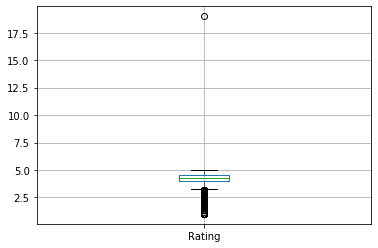

In [49]:
df_Apps.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019495ABBB48>]],
      dtype=object)

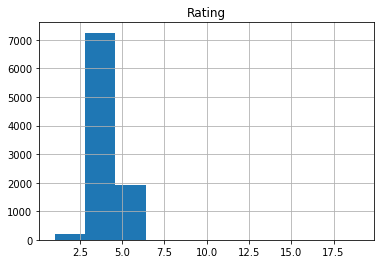

In [50]:
df_Apps.hist()

## After cleaning

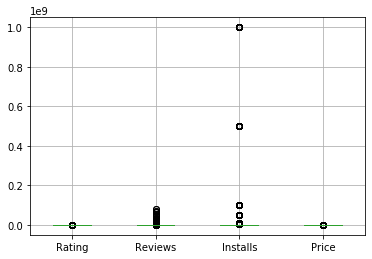

In [51]:
df_CAPP.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019496370588>,
      dtype=object)

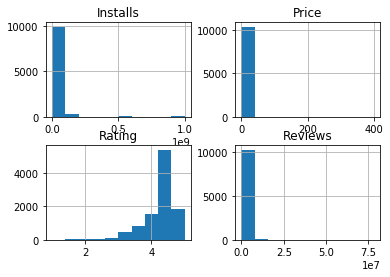

In [52]:
df_CAPP.hist()

<a id='Visual'></a>
## Data Visualization :

In [53]:
n_data = df_CAPP.shape[0];

In [54]:
type_order = df_CAPP['Category'].value_counts(ascending=True)

Text(0.5, 1.0, 'The Distribution of the frequency of App Categories')

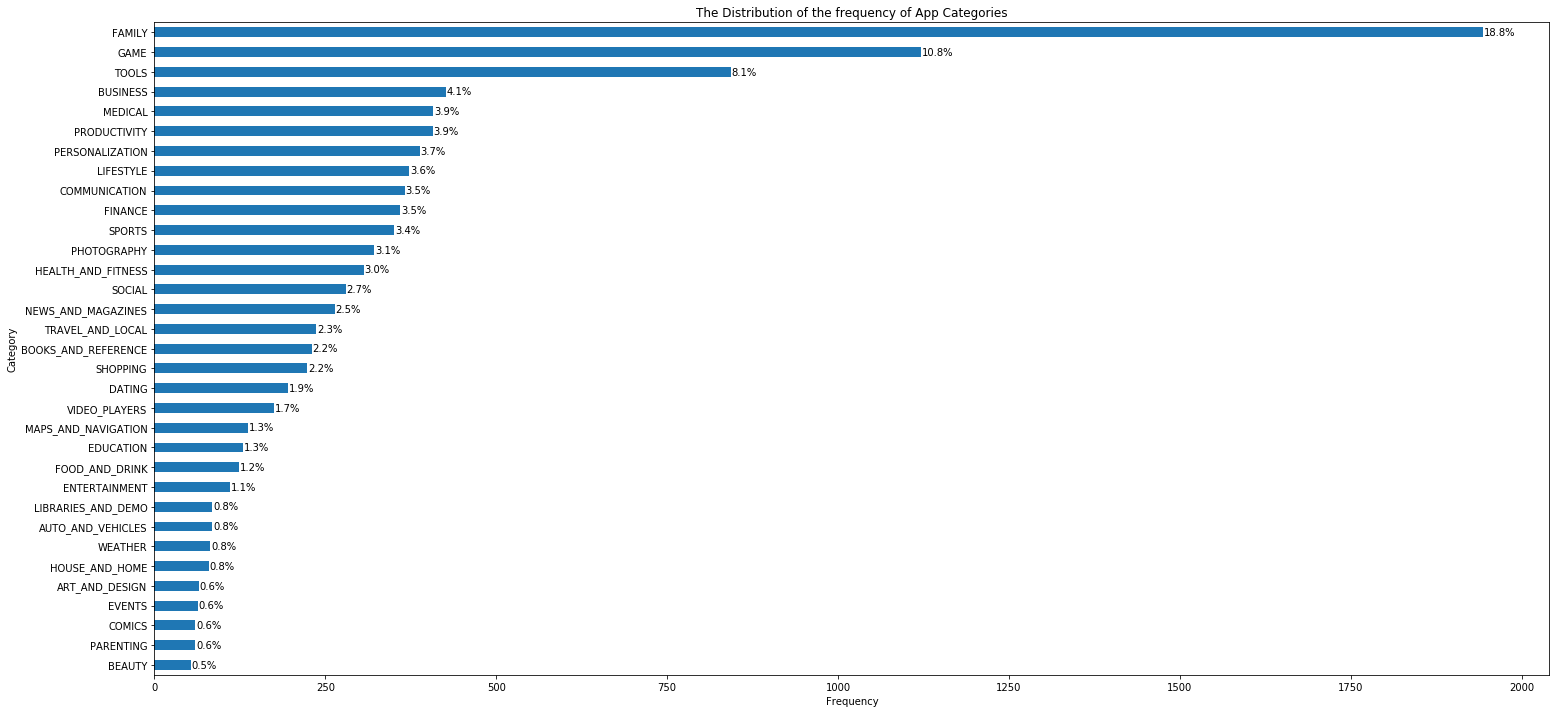

In [55]:
df_CAPP['Category'].value_counts(ascending=True).head(35).plot(kind='barh', figsize=(25,12))
for i in range (type_order.shape[0]):
    count = type_order[i];
    pct_string =  '{:0.1f}%' .format(100*count/n_data)
    plt.text(count+1, i, pct_string, va = 'center')
plt.xlabel('Frequency');
plt.ylabel('Category');
plt.title('The Distribution of the frequency of App Categories')

- Family Category includes about 18.8% of the apps and Games about 10.8% while the least common category is Beauty, parenting, Comics, event, and Art And Design with 0.6%.

In [56]:
base_color = sns.color_palette()[0]

In [57]:
Type_order = df_CAPP['Type'].value_counts(ascending=True)

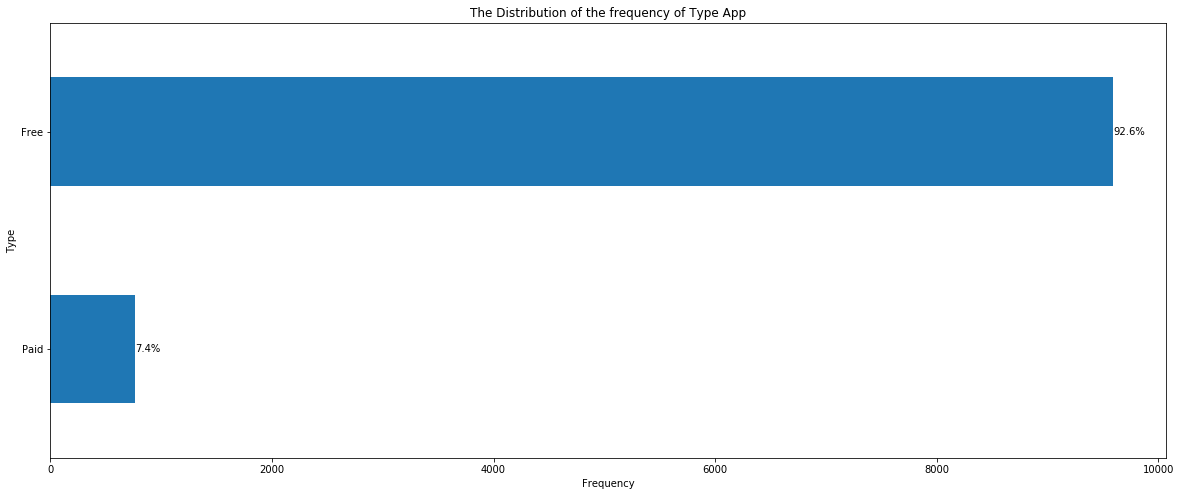

In [58]:
df_CAPP['Type'].value_counts(ascending=True).head(2).plot(kind='barh', figsize=(20,8))
for i in range (Type_order.shape[0]):
    count = Type_order[i];
    pct_string =  '{:0.1f}%' .format(100*count/n_data)
    plt.text(count+1, i, pct_string, va = 'center')
plt.ylabel('Type');
plt.xlabel('Frequency');
plt.title('The Distribution of the frequency of Type App');

- 92.6% of google apps are free and 7.4% are paid.

In [59]:
Contnt = df_CAPP['Content Rating'].value_counts(ascending=True)

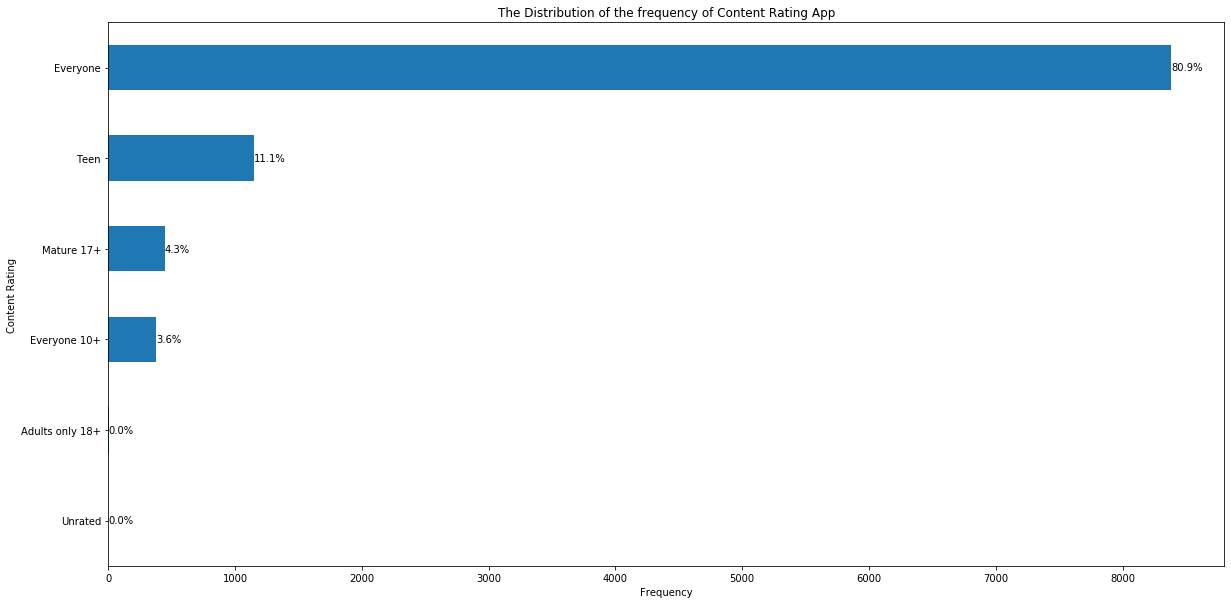

In [60]:
df_CAPP['Content Rating'].value_counts(ascending=True).head(8).plot(kind='barh', figsize=(20,10))
for i in range (Contnt.shape[0]):
    count = Contnt[i];
    pct_string =  '{:0.1f}%' .format(100*count/n_data)
    plt.text(count+1, i, pct_string, va = 'center')
plt.ylabel('Content Rating');
plt.xlabel('Frequency');
plt.title('The Distribution of the frequency of Content Rating App');

- 80.9% of content rating apps are for everyone while the Adults only +18 and unrated with numbers of 2, 3 are approximately 0%.

Text(0.5, 1.0, 'The frequency of rating')

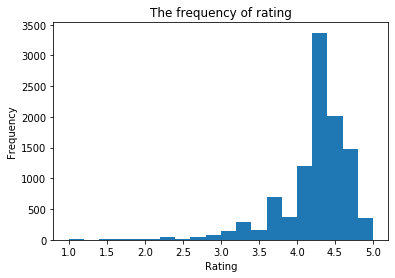

In [61]:
plt.hist(data = df_CAPP , x= 'Rating' , bins = 20);
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('The frequency of rating')

- About 3500 apps rated between 4.2 to 4.4 , less than 500 rated with 5.

Text(0.5, 1.0, 'The frequency of Price')

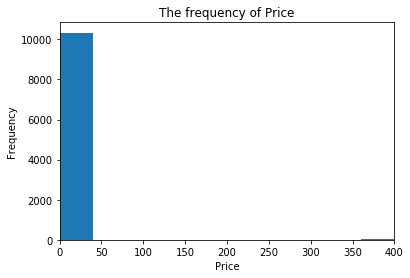

In [62]:
plt.hist(data = df_CAPP , x= 'Price');
plt.xlim(0,400)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('The frequency of Price')

In [63]:
(df_CAPP['Price'] == 400).sum()

1

- All the apps price between 0-45 and only one app with 400$.

In [64]:
grp = df_CAPP.groupby('Type')
Rating = grp['Rating'].agg(np.mean)
print(Rating)

Type
Free    4.19852
Paid    4.26915
Name: Rating, dtype: float64


Text(0, 0.5, 'Rating')

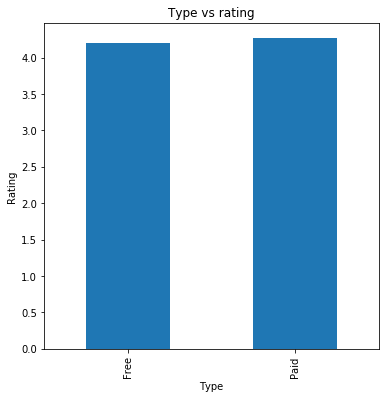

In [65]:
plt.figure(figsize=(6,6))
Rating.plot.bar(x='Type', y='Rating', rot=0)
plt.xticks(rotation = 90);
plt.title('Type vs rating')
plt.xlabel('Type')
plt.ylabel('Rating')

- The Rating average is slightly different between these two types, Free app have rated with 4.19852 on average while the paid app has rated with 4.26915 in average

In [66]:
df_CAPP

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000.0,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100.0,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.3,3,9.5M,1000.0,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000.0,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [67]:
grp2 = df_CAPP.groupby('Category')
Rate_C = grp2['Rating'].agg(np.mean)
Price_C = grp2['Price'].agg(np.mean)
Reviews_C = grp2['Reviews'].agg(np.mean)

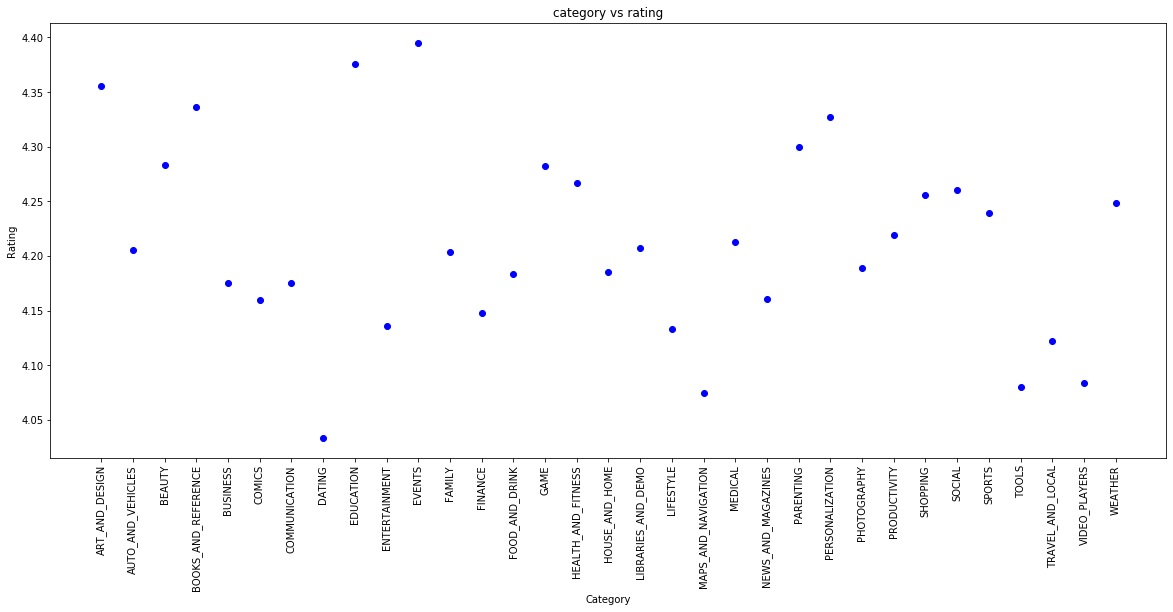

In [68]:
plt.figure(figsize=(20,8))
plt.plot(Rate_C,'o',color = 'b')
plt.xticks(rotation = 90)
plt.title('category vs rating')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.show()

- The top categories apps having the Highest rating are events, education, Books and reference, and art and design, while the apps having the worst rating are Dating, maps and navigation, tools, and video players.

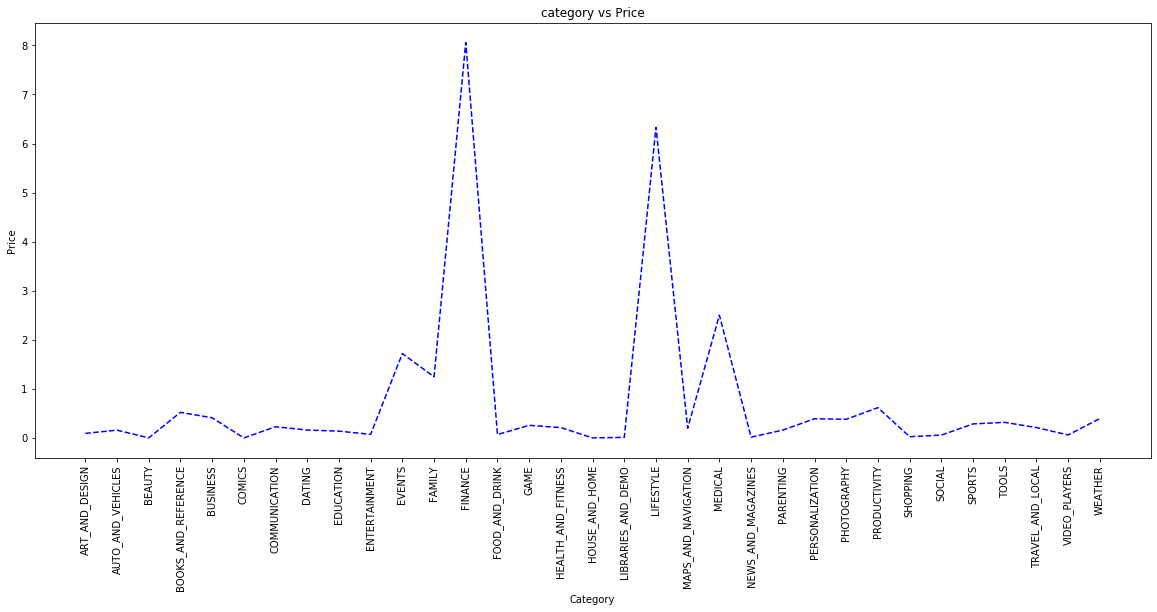

In [69]:
plt.figure(figsize=(20,8))
plt.plot(Price_C,'r--',color='b')
plt.xticks(rotation = 90)
plt.title('category vs Price')
plt.xlabel('Category')
plt.ylabel('Price')
plt.show()

- The highest price apps are finance, lifestyle, and medical.

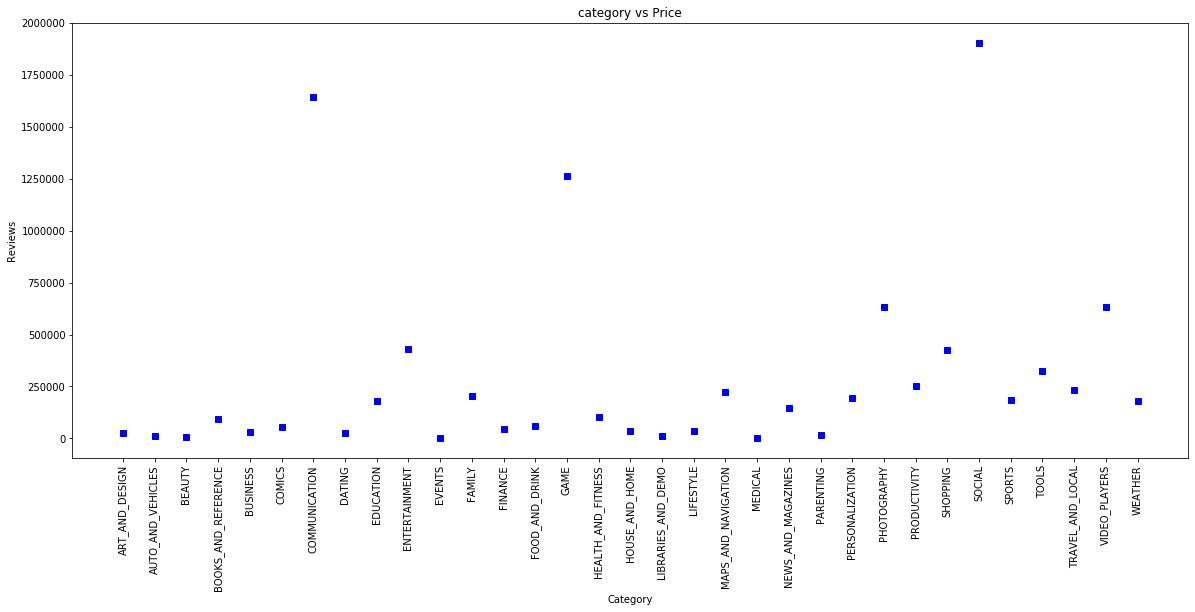

In [70]:
plt.figure(figsize=(20,8))
plt.plot(Reviews_C,'s',color='b')
plt.xticks(rotation = 90)
plt.title('category vs Price')
plt.xlabel('Category')
plt.ylabel('Reviews')
plt.show()

- The top categories of apps having the highest number of reviews are communication, game, and social apps.

<a id='con'></a>
## Conclusion Remarks:
- Family Category includes about 18.8% of the apps and Games about 10.8% while the least common category is Beauty, parenting, Comics, event, and Art And Design with 0.6%.
- 92.6% of google apps are free and 7.4% are paid.
- 80.9% of content rating apps are for everyone while the Adults only +18 and unrated with numbers of 2, 3 are approximately 0%.
- About 3500 apps rated between 4.2 to 4.4 , less than 500 rated with 5.
- All the apps price between 0-45 and only one app with 400$.
- The Rating average is slightly different between these two types, Free app have rated with 4.19852 on average while the paid app has rated with 4.26915 in average
- The top categories apps having the Highest rating are events, education, Books and reference, and art and design, while the apps having the worst rating are Dating, maps and navigation, tools, and video players.
- The highest price apps are finance, lifestyle, and medical.
- The top categories of apps having the highest number of reviews are communication, game, and social apps.